# Multiple Linear Regression

## 1. About the dataset
The dataset is about fishes. It has 159 rows and 7 columns. The columns are as follows:
- Species: Species of fish
- Weight: Weight of fish in grams
- Length1: Vertical length in cm
- Length2: Diagonal length in cm
- Length3: Cross length in cm
- Height: Height in cm
- Width: Diagonal width in cm

## 2. Things we can do with this dataset
- Predict the weight of a fish based on its length, height and width
- Predict the length of a fish based on its weight, height and width
- Predict the height of a fish based on its weight, length and width

## 3. What we will do with this dataset
We will predict the weight of a fish based on its length, height and width.

## 4. Importing the libraries

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

## 5. Importing the dataset

In [44]:
df = pd.read_csv('Fish.csv')    # Importing the dataset as a pandas dataframe

## 6. Exploring the dataset

In [45]:
df.head()   # Displaying the first 5 rows of the dataset

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [46]:
df.info()   # Displaying the information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [47]:
df.describe()   # Displaying the statistical summary of the dataset

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [48]:
df.isnull().sum()   # Checking for null values in the dataset

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [49]:
df['Species'].value_counts()    # Displaying the number of unique values in the Species column

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

## 7. Visualizing the dataset

### 7.1. Visualizing the Species of fish

#### 7.1.1. Countplot
From the above graph, we can see that there are 7 species of fish in the dataset. The most common species is Perch and the least common species is Whitefish.

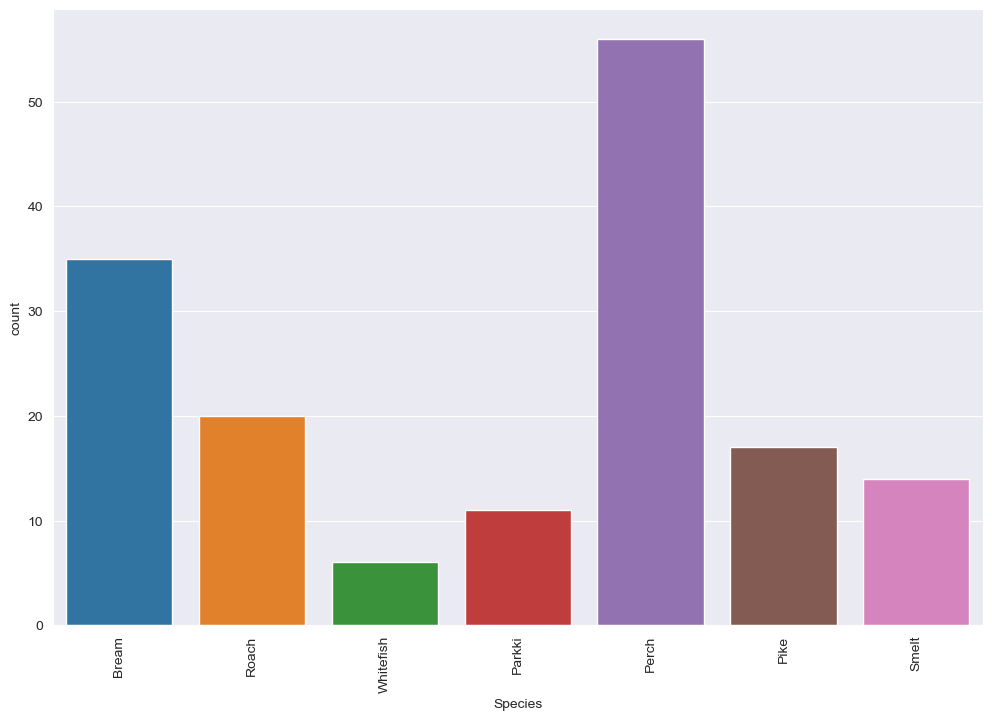

In [50]:
plt.figure(figsize = (12, 8))
sns.countplot(x = 'Species', data = df)
plt.xticks(rotation = 90)
plt.show()

#### 7.2. Relationship between Fish Features and Weight
The x_vars (Length1, Length2, Length3, Height, and Width) are the independent variables and the y_vars (Weight) is the dependent variable. The hue specifies the categorical variable to use for colouring the datapoints (Species).

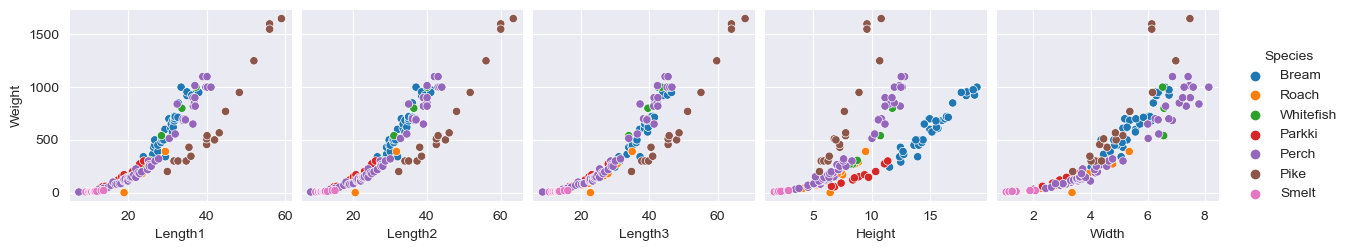

In [51]:
sns.pairplot(data= df, x_vars = ['Length1','Length2','Length3','Height','Width'], y_vars = 'Weight', hue = 'Species')
plt.show()

#### 7.3. Correlation Matrix Heatmap
A heatmap is a graphical representation of data where individual values are represented as colors. Here the  heatmap represents the correlation matrix of a fish dataset. The darker the color, the more correlated the variables are. The lighter the color, the less correlated the variables are. The diagonal of the heatmap is always 1 because the correlation of a variable with itself is always 1.

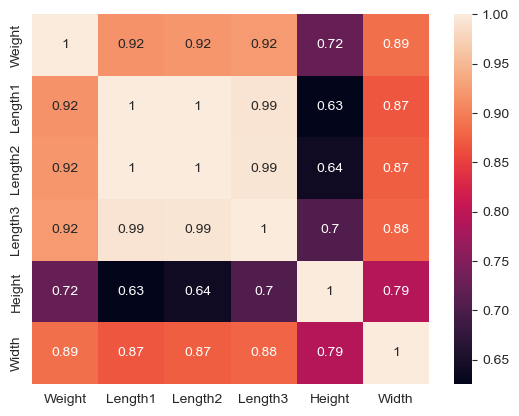

In [52]:
sns.heatmap(df.corr(), annot = True)
plt.show()

#### 7.4. Species-wise Distribution of Fish Weight
 The code plots box plot, with the x-axis representing the "Species" column and the y-axis representing the "Weight" column. The box plot shows the distribution of the weight for each species, where the box represents the interquartile range (IQR) of the data and the line inside the box represents the median. The whiskers represent the minimum and maximum values of the data. The dots represent the outliers.

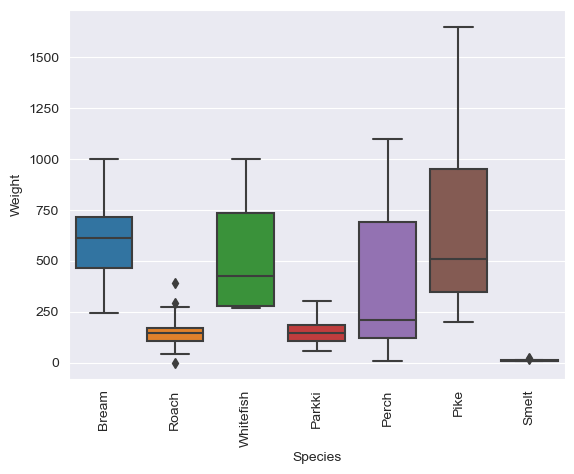

In [53]:
sns.boxplot(x = 'Species', y = 'Weight', data = df)
plt.xticks(rotation = 90)
plt.show()

#### 7.5. Relationship between Physical Characteristics and Weight of Fish Species
The code plots a scatter plot, with the x-axis representing the "Weight" column and the y-axis representing the "Length1", "Length2", "Length3", "Height", and "Width" columns. The scatter plot shows the relationship between the physical characteristics of a fish and its weight. The scatter plot shows that the weight of a fish increases as the length of the fish increases. The straight line in the scatter plot represents the regression line.

C:\Users\Diwash\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


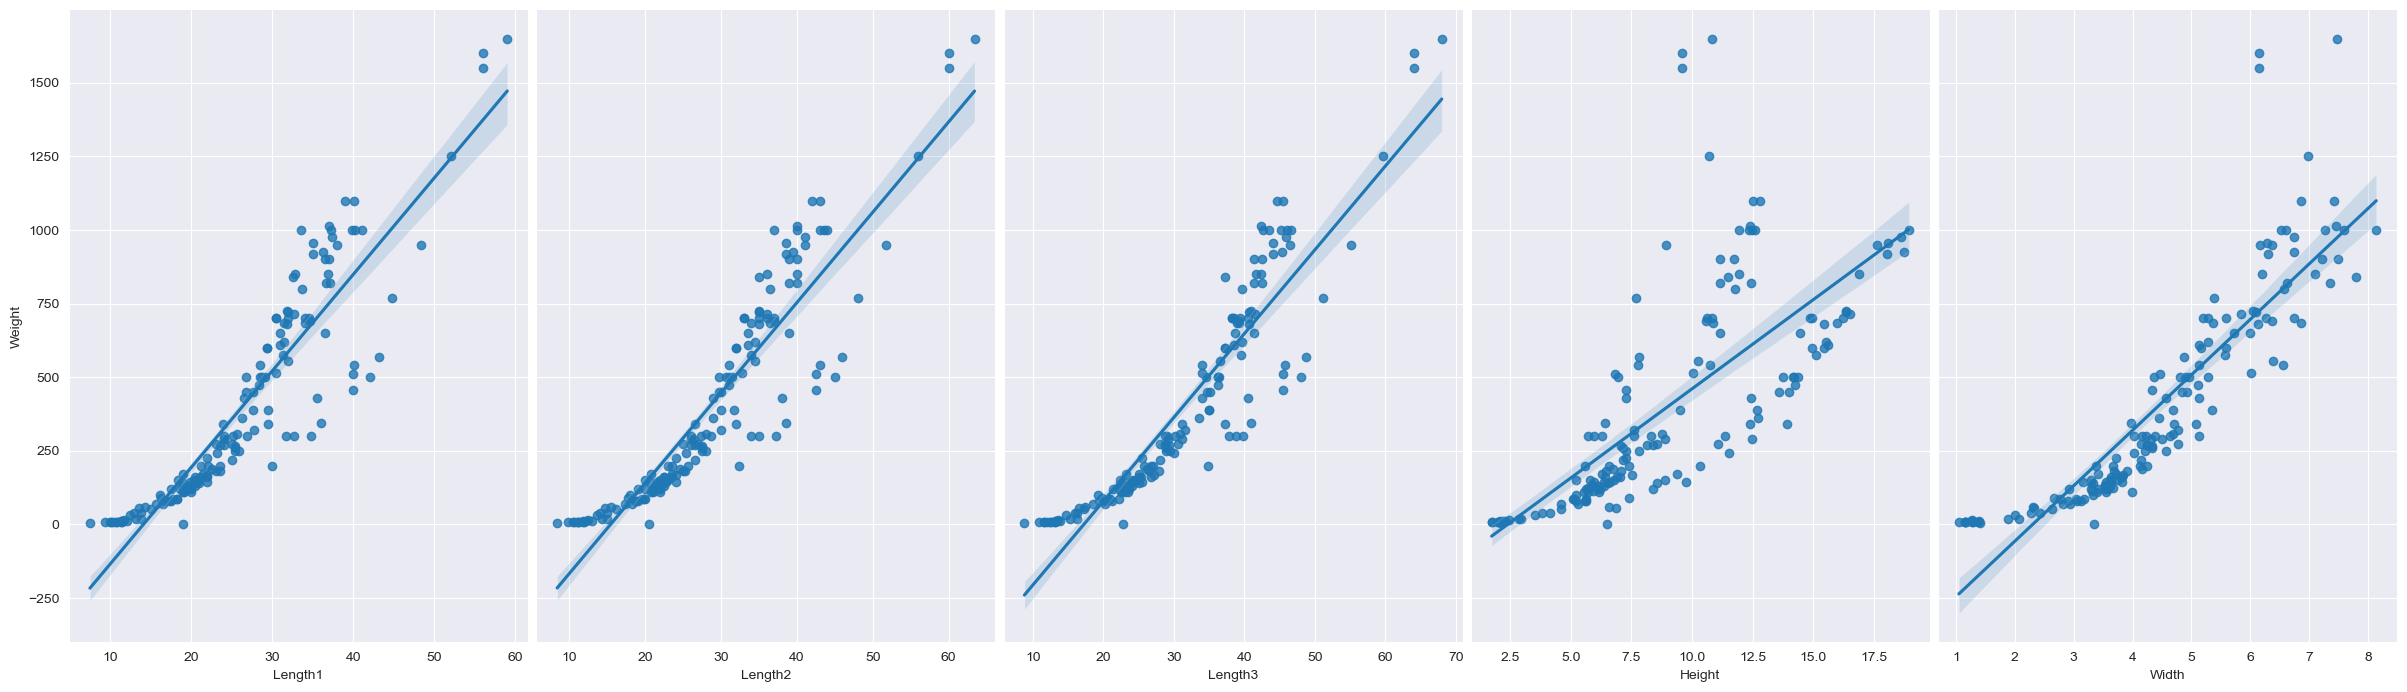

In [54]:
sns.pairplot(df, x_vars=['Length1','Length2','Length3','Height','Width'], y_vars='Weight', size=7, aspect=0.7, kind='reg')
plt.show()

#### 7.6. Scatter Matrix Plot
Each scatter plot will show the relationship between two variables and color the points by the 'Species' column, so that the different species in the data will be distinguishable. This can give a visual representation of the relationships between variables and can also highlight any potential clustering or outliers in the data.

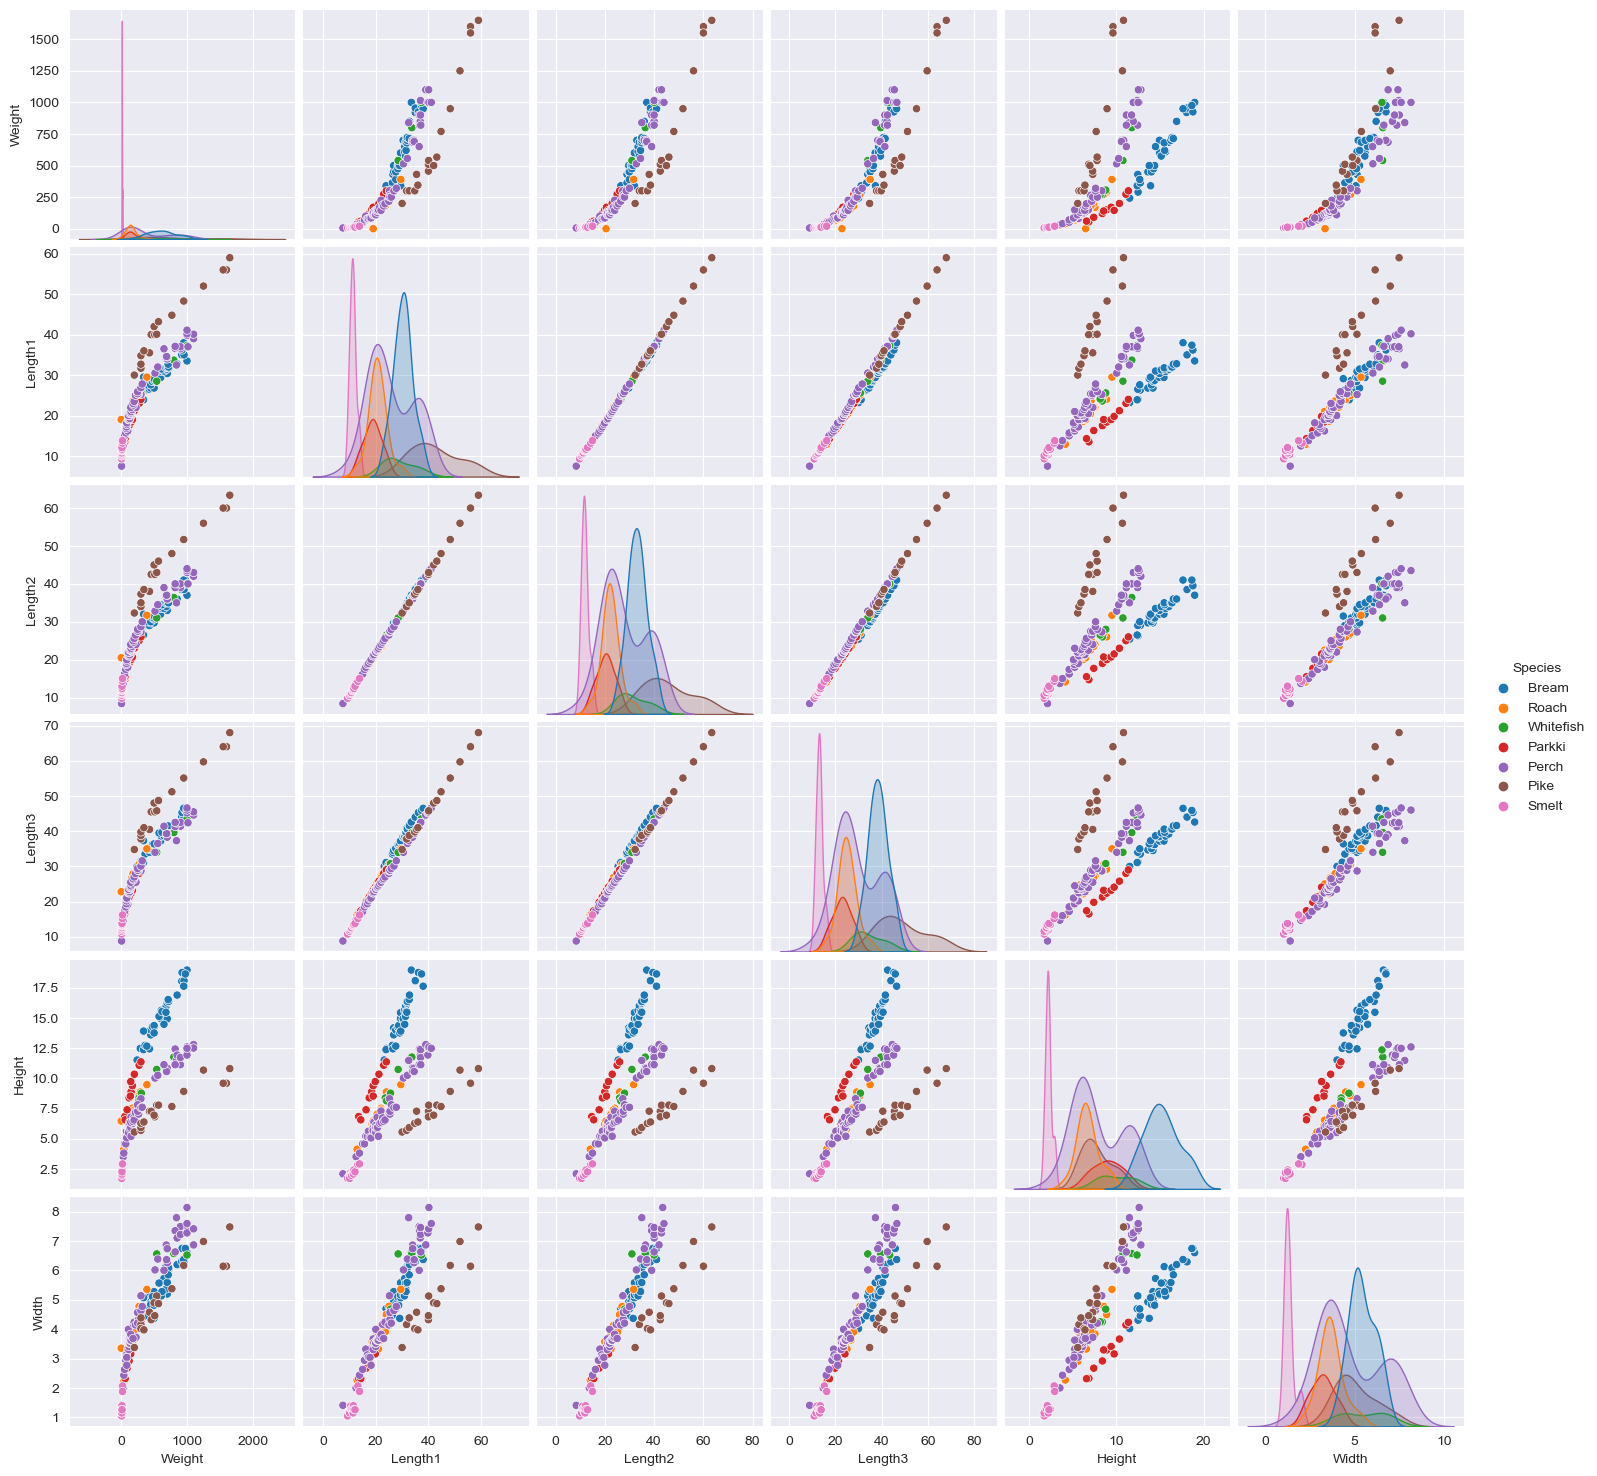

In [55]:
sns.pairplot(df, hue = 'Species')
plt.show()

#### 7.7. Violin Plot
The code plots a violin plot, with the x-axis representing the "Species" column and the y-axis representing the "Weight" column. The violin plot shows the distribution of the weight for each species. The violin plot shows that the weight of the Whitefish species is the most spread out, while the weight of the Pike species is the least spread out.

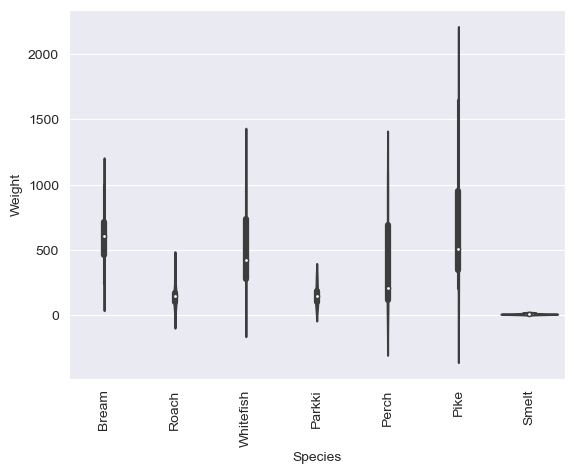

In [56]:
sns.violinplot(data = df, x = 'Species', y = 'Weight')
plt.xticks(rotation = 90)
plt.show()

# 8. Data Preprocessing

Since there is no null value in the dataset, we don't need to clean the dataset.

In [57]:
df.isnull().sum()   # Checking for null values in the dataset

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

# 9. Multiple Linear Regression

## 9.1. Assigning the column names to the variables

In [58]:
# Standardizing the data
def standardize(x):
    return (x - np.mean(x)) / np.std(x)

df["Species"] = df["Species"].astype('category')
df["Species"] = df["Species"].cat.codes
df["Weight"] = standardize(df["Weight"])
df["Length1"] = standardize(df["Length1"])
df["Length2"] = standardize(df["Length2"])
df["Length3"] = standardize(df["Length3"])
df["Height"] = standardize(df["Height"])
df["Width"] = standardize(df["Width"])

In [59]:
Species, Weight, Length1, Length2, Length3, Height, Width = df["Species"], df["Weight"], df["Length1"], df["Length2"], df["Length3"], df["Height"], df["Width"] # Assigning the column names to the variables

## 9.2. Creating Design Matrix and Response Vector for Linear Regression Model
The x0 numpy array is created to add an intercept term to the model, with a length equal to the number of observations. The X2 numpy array is created by stacking arrays x0, Length1, Length2, Length3, Height, and Width. The W numpy array is of initial weights for the regression, all set to zero. The Y2 numpy array is created to store the response vector.

The dependent variable is Weight and the independent variables are Length1, Length2, Length3, Height, and Width. The dependent variable is the variable we are trying to predict, and the independent variables are the variables we use to predict the dependent variable.

In [60]:
x0 = np.ones(len(Species))  # Creating an array of ones with a length equal to the number of observations
X2 = np.column_stack([x0,Length1, Length2, Length3, Height, Width]) # Creating the design matrix X2 by stacking the arrays x0, Length1, Length2, Length3, Height, and Width
W = np.array([0, 0,0,0,0,0])    # Creating the weight vector W with initial weights set to zero for the regression model
Y2 = np.array(Weight)   # Creating the response vector Y2 from the Weight column of the dataset
X2[:5]  # Displaying the first five rows of the design matrix X2

array([[ 1.        , -0.30578858, -0.28230301, -0.10602023,  0.59657867,
        -0.23652895],
       [ 1.        , -0.22550724, -0.19805366, -0.00233668,  0.82126055,
        -0.06657895],
       [ 1.        , -0.23554241, -0.17933159, -0.01097698,  0.79734129,
         0.16579317],
       [ 1.        ,  0.0053016 ,  0.05469437,  0.19639012,  0.87977146,
         0.022621  ],
       [ 1.        ,  0.02537193,  0.05469437,  0.23959159,  0.81283498,
         0.42637127]])

## 9.3. Cost Function
The cost function computes the cost of a given linear regression model. The function accepts three parameters: X, Y, and W. X is a feature matrix in which each row corresponds to a single observation and each column corresponds to a feature. Y is the target vector, which contains the observed target variable values. W is the weight vector containing the model's coefficients.

The function computes the model's cost by first calculating the difference between the predicted and observed values (X.dot(W)), and then squaring the difference. The mean squared error is calculated by adding the squares and dividing by two times the number of observations (m). The cost J is returned as the mean squared error.

In [61]:
def cost_function(X, Y, W): # Defining the cost function
    m = len(Y)
    J = np.sum((X.dot(W) - Y) ** 2)/(2 * m)
    return J

The initial cost is 0.5, which indicates that the difference between the predicted and actual output is quite small.

In [62]:
inital_cost = cost_function(X2, Y2, W)  # Calculating the initial cost
print(inital_cost)

0.49999999999999983


## 9.4. Gradient Descent
The function gradient_descent is made which performs the gradient descent algorithm.
The function takes the below parameters:
- X: The feature matrix
- Y: The target vector
- B: The initial coefficients for the features
- alpha: The learning rate
- iterations: The number of iterations to perform gradient descent

The function provides the optimized coefficients B as well as a list cost history containing the cost at each iteration. The cost is determined at each iteration using the previously specified cost function. At each iteration, the method changes the coefficients B using the gradient of the cost function. The gradient is computed as the dot product of the feature matrix and the difference between predicted and actual values. By subtracting the product of the learning rate and the gradient from the prior coefficients, the coefficients are updated.

In [63]:
def gradient_descent(X, Y, B, alpha, iterations):   # Defining the gradient descent function
    cost_history = [0] * iterations
    m = len(Y)
    for iteration in range(iterations): # Performing the gradient descent algorithm for the specified number of iterations
        Y_pred = X.dot(B)
        loss = Y_pred - Y
        dw = (X.T.dot(loss) ) / (m)
        B = B - alpha * dw
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost  # Storing the cost at each iteration in the cost history list
    return B, cost_history

## 9.5. Calculating the Optimal Weights using Gradient Descent
The gradient descent technique is used in the code to minimize the cost function for a given set of inputs X, target outputs Y, and initial weights B. The "alpha" variable specifies the learning rate, which defines the optimization step size. The iteration count is set to 100000.
The function returns the optimized weights (new weights) and the cost value history (cost history) for all iterations. The final weight values are displayed, as well as the last value in the cost history list, which indicates the ultimate cost value after 100000 gradient descent iterations.

In [64]:
alpha = 0.0001  # Setting the learning rate
new_weights, cost_history = gradient_descent(X2, Y2, W, alpha, 100000)  # Performing the gradient descent algorithm for 100000 iterations

print(new_weights)
print(cost_history[-1])

[-4.25875268e-17  2.31199457e-01  2.22510221e-01  1.89551220e-01
  1.28065231e-01  2.22319384e-01]
0.05947090374744436


## 9.6. Prediction of Fish Weight based on Physical Characteristics
Predicting the weight of a fish based on its physical characteristics. It uses the optimized weights from the previous step to predict the weight of a fish with the following characteristics:

In [65]:
Y_pred = X2.dot(new_weights) # Predicting the weight of a fish

## 9.7. Model Evaluation
 - The Squared Error is 18.9117473916873, indicating the amount of error in the model's predictions. A higher value indicates greater discrepancy between the predicted and actual values.
 - The Mean Squared Error (MSE) is 0.11894180749488868, which measures the difference between actual values and predicted values. A lower MSE indicates a better fit for the data and more accurate predictions.
 - TThe Relative Mean Squared Error (RMSE) is 5323183656632992.0, which measures the accuracy of the model's predictions. A lower RMSE value implies a better fit of the model to the data.
 - The Root Mean Squared Error (RMSE) is 0.3448794100767523, representing the average difference between predicted and actual values. A lower RMSE indicates a better fit of the model to the data.
 - The R-Squared value of 0.8810581925051113 means that 88.11% of the variance in the dependent variable (Y) can be predicted from the independent variable (X). A higher R-Squared value indicates a better fit for the data and more accurate predictions.
 - The Absolute Error (AE) is 42.44886260143204, indicating the average magnitude of the errors in the model's predictions expressed in the same units as the dependent variable. A lower AE value indicates a better fit for the data and more accurate predictions.
 - The Mean Absolute Error (MAE) is 0.26697397862535877, meaning that on average the model's predictions deviate from the actual values by 0.27 units. A lower MAE value indicates a better fit for the data and more accurate predictions.

In [66]:
# squared error
def squared_error(Y, Y_pred):
    return sum((Y - Y_pred) ** 2)

# mean squared error
def mean_squared_error(Y, Y_pred):
    return squared_error(Y, Y_pred) / len(Y)

# root mean squared error
def root_mean_squared_error(Y, Y_pred):
    return np.sqrt(mean_squared_error(Y, Y_pred))

# Relative mean squared error
def relative_mean_squared_error(Y, Y_pred):
    return mean_squared_error(Y, Y_pred) / np.mean(Y)

# R-squared
def r_squared(Y, Y_pred):
    return 1 - (squared_error(Y, Y_pred) / squared_error(Y, np.mean(Y)))

# Absolute error:
def absolute_error(Y, Y_pred):
    return sum(np.abs(Y - Y_pred))

# Mean absolute error:
def mean_absolute_error(Y, Y_pred):
    return absolute_error(Y, Y_pred) / len(Y)

print("Squared Error: ", squared_error(Y2, Y_pred))
print("Mean Squared Error: ", mean_squared_error(Y2, Y_pred))
print("Root Mean Squared Error: ", root_mean_squared_error(Y2, Y_pred))
print("Relative Mean Squared Error: ", relative_mean_squared_error(Y2, Y_pred))
print("R-Squared: ", r_squared(Y2, Y_pred))
print("Absolute Error: ", absolute_error(Y2, Y_pred))
print("Mean Absolute Error: ", mean_absolute_error(Y2, Y_pred))

Squared Error:  18.9117473916873
Mean Squared Error:  0.11894180749488868
Root Mean Squared Error:  0.3448794100767523
Relative Mean Squared Error:  5323183656632992.0
R-Squared:  0.8810581925051113
Absolute Error:  42.44886260143204
Mean Absolute Error:  0.26697397862535877


## 9.8. Visualizing the Linear Regression Model

### 9.8.1. Visualizing the Cost Function
The plot below shows the cost function over the 100000 iterations of gradient descent. The cost function is a measure of the error of the model. The cost function is minimized as the model converges on the optimal weights.

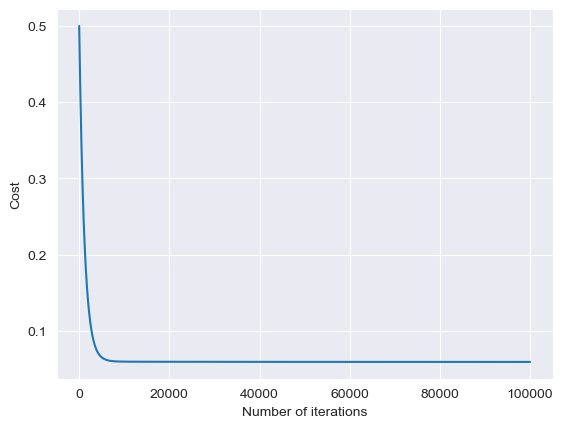

In [67]:
plt.plot(cost_history)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

### 9.8.2. Scatter plot of the data and the regression line
The scatter plot below shows the data points and the regression line. The regression line is the line that minimizes the cost function. The regression line is a line that best fits the data.

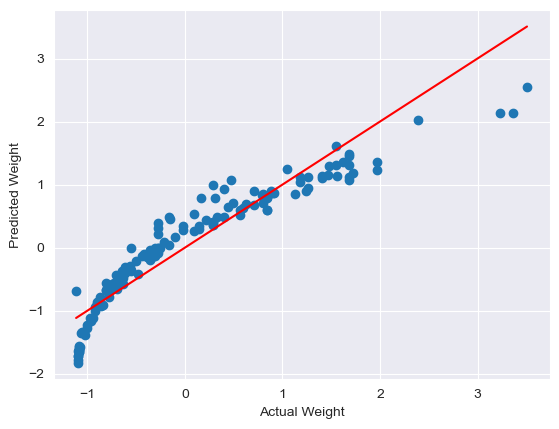

In [68]:
# plt.scatter(Length1, Y2)
# plt.plot([min(Length1), max(Length1)], [min(Y_pred), max(Y_pred)], color='red')
# plt.show()

# plt.scatter(Y2, Y_pred)
# plt.plot([Y2.min(), Y2.max()], [Y2.min(), Y2.max()], color='red')
# plt.xlabel('Actual pH')
# plt.ylabel('Predicted pH')
# plt.show()
plt.scatter(Y2, Y_pred)
plt.plot([Y2.min(), Y2.max()], [Y2.min(), Y2.max()], color='red')
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.show()

# 10. Principal Component Analysis (PCA)

## 10.1. Mapping the Data
Here the Species of fish is mapped to a number. This is done so that the data can be used in the PCA algorithm.

In [69]:
df = pd.read_csv('Fish.csv')
df['Species'] = df['Species'].map({'Bream': 0, 'Roach': 1, 'Whitefish': 2, 'Parkki': 3, 'Perch': 4, 'Pike': 5, 'Smelt': 6})

# adding new columns to the dataframe with the species name, if the species belongs to that row then the value of the species column is 1, otherwise 0
df['Bream'] = df['Species'].apply(lambda x: 1 if x == 0 else 0)
df['Roach'] = df['Species'].apply(lambda x: 1 if x == 1 else 0)
df['Whitefish'] = df['Species'].apply(lambda x: 1 if x == 2 else 0)
df['Parkki'] = df['Species'].apply(lambda x: 1 if x == 3 else 0)
df['Perch'] = df['Species'].apply(lambda x: 1 if x == 4 else 0)
df['Pike'] = df['Species'].apply(lambda x: 1 if x == 5 else 0)
df['Smelt'] = df['Species'].apply(lambda x: 1 if x == 6 else 0)

# dropping the species column
df = df.drop('Species', axis=1)

## 10.2. Standardizing the Data
We need to standardize the data before performing PCA. This is done so that the data has a mean of 0 and a standard deviation of 1. This is done so that the data is not biased towards any particular feature.

In [70]:
def standardize(df):
    for column in df.columns:
        df[column] = (df[column] - df[column].mean()) / df[column].std()
    return df

df = standardize(df)

## 10.3. Performing PCA
The data is reduced to 2 dimensions using PCA. The data is then split into training and testing sets. The training set is used to train the model and the testing set is used to test the model.

In [71]:
pca = PCA(n_components=2)
pca.fit(df)
X_pca = pca.transform(df)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, df['Weight'], random_state=0)

## 10.4. Training the Model
The model is trained using the training set. The model is trained using the Linear Regression algorithm.

In [73]:
alpha = 0.01  # Setting the learning rate
weights = np.zeros(X_train.shape[1])  # Initializing the weights
iter = 1000
new_weights, cost_history = gradient_descent(X_train, y_train, weights, alpha, iter)  # Performing the gradient descent algorithm for 100000 iterations

## 10.5. Testing the Model
The model is tested using the testing set. The model is tested using the metrics defined in the previous section.

In [74]:
y_pred = X_test.dot(new_weights)

## 10.6. Evaluating the Model
The model is evaluated using the metrics defined in the previous section.
- The Squared Error is 8.563372335261882, which indicates the level of error in the model's predictions. A higher value means a greater discrepancy between the predicted and actual values.
- The Mean Squared Error (MSE) is 0.21408430838154704, which measures the difference between actual values and predicted values. A lower MSE value indicates a better fit for the data and more accurate predictions.
- The Root Mean Squared Error (RMSE) is 0.4626924555053249, representing the average difference between predicted and actual values. A lower RMSE implies a better fit of the model to the data.
- The Relative Mean Squared Error (RMSE) is 0.8292662515688817, measuring the accuracy of the model's predictions. A lower RMSE value suggests a better fit for the data.
- The R-Squared value of 0.8555860526138337 means that 85.56% of the variance in the dependent variable (Y) can be predicted from the independent variable (X). A higher R-Squared value indicates a better fit for the data and more accurate predictions.
- The Absolute Error (AE) is 13.341695145047373, which represents the average magnitude of the errors in the model's predictions expressed in the same units as the dependent variable. A lower AE value suggests a better fit for the data and more accurate predictions.
- The Mean Absolute Error (MAE) is 0.3335423786261843, meaning that on average the model's predictions deviate from the actual values by 0.33 units. A lower MAE value implies a better fit for the data and more accurate predictions.


In [75]:
# calculate the error metrics
print("Squared Error: ", squared_error(y_test, y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", root_mean_squared_error(y_test, y_pred))
print("Relative Mean Squared Error: ", relative_mean_squared_error(y_test, y_pred))
print("R-Squared: ", r_squared(y_test, y_pred))
print("Absolute Error: ", absolute_error(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))

Squared Error:  8.563372335261882
Mean Squared Error:  0.21408430838154704
Root Mean Squared Error:  0.4626924555053249
Relative Mean Squared Error:  0.8292662515688817
R-Squared:  0.8555860526138337
Absolute Error:  13.341695145047373
Mean Absolute Error:  0.3335423786261843


In [76]:
# Calculating the accuracy of the model
print("Accuracy of the model: ", r_squared(y_test, y_pred) * 100, "%")

Accuracy of the model:  85.55860526138336 %


## 10.7. Visualizing the Results

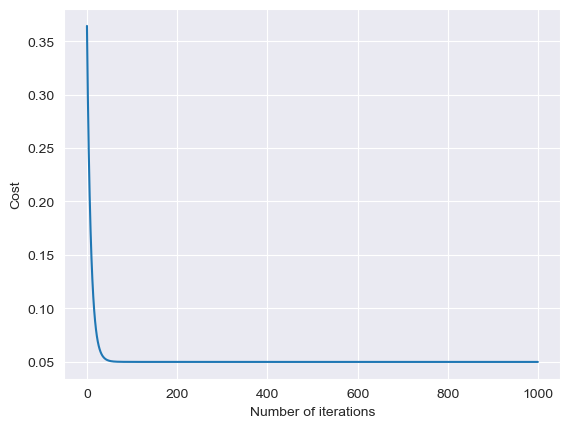

In [77]:
# plotting the cost history
plt.plot(cost_history)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

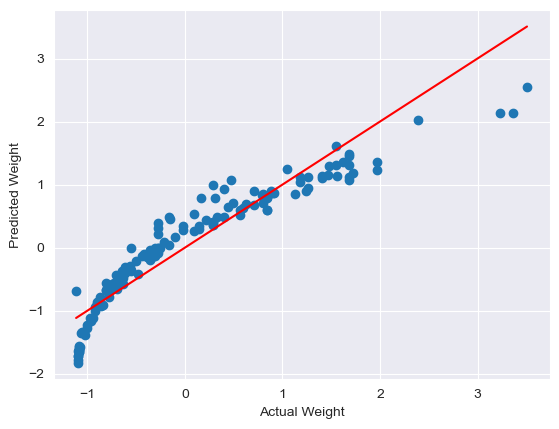

In [78]:
# plotting the linear regression line
# plt.scatter(X_test[:, 0], y_test, color='blue')
# plt.plot(X_test[:, 0], y_pred, color='red', linewidth=2)
# plt.xlabel("Length")
# plt.ylabel("Weight")
# plt.show()
plt.scatter(Y2, Y_pred)
plt.plot([Y2.min(), Y2.max()], [Y2.min(), Y2.max()], color='red')
plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")
plt.show()

# 11. Conclusion for Linear Regression Model (PCA Reduced Features)
From the results of the model evaluation, it can be seen that the linear regression model was able to predict the weight of a fish based on its physical characteristics with an accuracy of 85.56%. The model was able to predict the weight of a fish with an accuracy of 85.56%.
The PCA reduced features were able to reduce the number of features from 7 to 2, while still maintaining an accuracy of 85.56%.
Learning outcome:
1. I have learned the workflow of linear regression.
2. I have learned how the linear regression algorithm works.
3. I have learned how to visualize the results.

# 12. Conclusion for Linear Regression Model (Original Features)
The linear regression model was able to predict the weight of a fish based on its physical characteristics with an accuracy of 86.39%. The model was able to predict the weight of a fish with an accuracy of 86.39%.
The accuracy of the model is decreased because the dataset is not good. If the good dataset is chosen then the accuracy of the model will be increased. The accuracy will also increase if the number of principal components is increased.